In [147]:
# Importimg the required libraries
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

In [148]:
# Enable cache
ff1.Cache.enable_cache('cache')

# Setup plotting 
plotting.setup_mpl()

C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


In [ ]:
# Load the data
# ff1.get_session(year, race, session)
# Q qualifying, FP1, FP2, FP3, R race

session = ff1.get_session(2021, "Abu Dhabi", "Q")

# Load session data
session.load()

core           INFO 	Loading data for Abu Dhabi Grand Prix - Practice 1 [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\core.py:1591: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-package

In [150]:
best_ver = session.laps.pick_driver('VER').pick_fastest()

best_ver	

C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Time                      0 days 00:51:21.850000
Driver                                       VER
DriverNumber                                  33
LapTime                   0 days 00:01:25.009000
LapNumber                                   12.0
Stint                                        3.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:17.535000
Sector2Time               0 days 00:00:36.454000
Sector3Time               0 days 00:00:31.020000
Sector1SessionTime        0 days 00:50:14.376000
Sector2SessionTime        0 days 00:50:50.830000
Sector3SessionTime        0 days 00:51:21.850000
SpeedI1                                    283.0
SpeedI2                                    313.0
SpeedFL                                    210.0
SpeedST                                    320.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife            

In [151]:
# Selecting laps for verstappen and hamilton
laps_ver = session.laps.pick_drivers('VER')
laps_ham = session.laps.pick_drivers('HAM')

# laps_ver

In [152]:
# Get telemetry data for fastest lap
fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_ham = laps_ham.pick_fastest().get_telemetry().add_distance()



C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] \
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] \
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\L

In [153]:
# Creating column name
fastest_ver['Driver'] = 'VER'
fastest_ham['Driver'] = 'HAM'


# Merging the data
telemetry = fastest_ver.append(fastest_ham)

C:\Users\rhihi\AppData\Local\Temp\ipykernel_33120\1372731268.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = fastest_ver.append(fastest_ham)


In [154]:
# we want 25 mini sectors 
num_mini_sectors = 25

# gran max value of distance that is known in telemetry
total_distance = max(telemetry['Distance'])

# create the mini sectors equally spaced
minisector_length = total_distance / num_mini_sectors

In [155]:
# init minisector variable
minisector = [0]

# adding multiple of minisectors_length to minisector
for i in range(0, (num_mini_sectors - 1)):
    minisector.append(minisector_length * (i + 1))


In [156]:
# creating Minisector column to know which minisector the car was at the moment the datapoint was recorded
telemetry['Minisector'] = telemetry['Distance'].apply(
		lambda dist: (
			int((dist // minisector_length) + 1)
		)
)

In [157]:
# calculating fastest driver per mini sector
avg_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()

In [158]:
avg_speed

,Minisector,Driver,Speed
0,1,HAM,254.285714
1,1,VER,254.592593
2,2,HAM,228.250000
3,2,VER,223.433333
4,3,HAM,207.064516
5,3,VER,209.866667
6,4,HAM,256.222222
7,4,VER,253.461538
8,5,HAM,271.565217
9,5,VER,267.875000


In [159]:
# Selecting the driver with the fastest speed per minisector
fastest_driver =  avg_speed.loc[avg_speed.groupby('Minisector')['Speed'].idxmax()]

# Remove speed column and rename driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest Driver'})

In [160]:
fastest_driver

,Minisector,Fastest Driver
1,1,VER
2,2,HAM
5,3,VER
6,4,HAM
8,5,HAM
10,6,HAM
13,7,VER
14,8,HAM
17,9,VER
19,10,VER


In [161]:
# mergind the fastest driver to the telemetry data
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance
telemetry = telemetry.sort_values(by=['Distance'])

# conver Ver to 1 and Ham to 2
telemetry.loc[telemetry['Fastest Driver'] == 'VER', 'Fastest Driver int'] = 1
telemetry.loc[telemetry['Fastest Driver'] == 'HAM', 'Fastest Driver int'] = 2


In [162]:
# telemetry

C:\Users\rhihi\AppData\Local\Temp\ipykernel_33120\160299814.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('winter', 2) # plasma winter magma inferno viridis


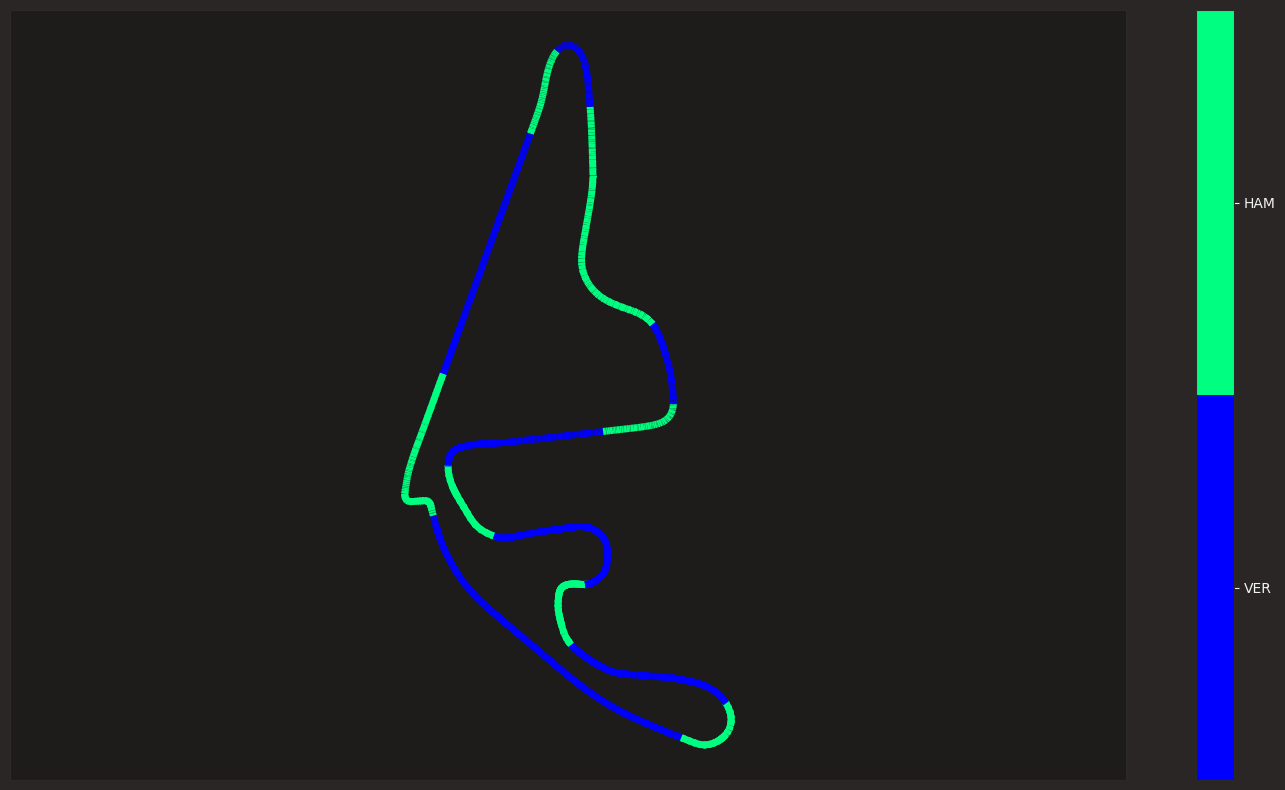

In [167]:
# Extracting x and y coordinates
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

# Combining x and y coordinates
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest Driver int'].to_numpy().astype(float)

# Colorng the line based on the fastest driver
cmap = cm.get_cmap('winter', 2) # plasma winter magma inferno viridis
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap = cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

# making the plot bigger
plt.rcParams["figure.figsize"] = (18, 10)

# Plotting
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False,left=False,labelbottom=False,bottom=False)

# # addind legend
# cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 4))
# cbar.set_ticks(np.arange(1.5,9.5))
# cbar.set_ticklabels(['VER', 'HAM'])

# Adding legend
cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 4))  # Adjusted boundaries to match driver indices
cbar.set_ticks([1.5, 2.5])  # Setting exact tick locations for 'VER' and 'HAM'
cbar.set_ticklabels(['VER', 'HAM'])  # Correct number of labels


plt.show()